In [65]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import matplotlib.colors as colors
import numpy as np
from scipy.optimize import nnls

# Smarter model, paper model

In [66]:
def normalize_model1(df):
    percentages=independent_variables=[  'ProbabilityMemLoadVectorMemory', 'ProbabilityUnclassifiedBranch',
       'ProbabilityMemUpdateVectorLogic', 'ProbabilityMemUpdateVectorMemory',
       'ProbabilityMemStoreScalarLogic',
       'ProbabilityMemStoreVectorLogic', 
       'ProbabilityMemUpdateUnclassifiedLogic', 
       'ProbabilityMemUpdateScalarMemory',
       'ProbabilityMemStoreUnclassifiedMemory',
       'ProbabilityMemStoreVectorArithmetic', 'ProbabilityRegisterScalarLogic',
       'ProbabilityMemStoreVectorMemory', 'ProbabilityMemUpdateScalarLogic',
       'ProbabilityRegisterScalarArithmetic',
       'ProbabilityMemLoadScalarArithmetic', 'ProbabilityScalarBranch',
       'ProbabilityMemLoadVectorLogic',
       'ProbabilityRegisterScalarMemory',
       'ProbabilityRegisterVectorArithmetic',
       'ProbabilityRegisterUnclassifiedArithmetic',
       'ProbabilityMemUpdateScalarArithmetic', 'ProbabilityMemLoadScalarLogic',
       'ProbabilityMemLoadVectorArithmetic', 'ProbabilityMemLoadScalarMemory',
       'ProbabilityVectorBranch', 'ProbabilityMemLoadUnclassifiedArithmetic',
       'ProbabilityRegisterVectorLogic',
       'ProbabilityMemUpdateUnclassifiedArithmetic',
       'ProbabilityMemUpdateVectorArithmetic',
       'ProbabilityRegisterUnclassifiedLogic', 
       'ProbabilityMemLoadUnclassifiedLogic',
       'ProbabilityMemStoreUnclassifiedArithmetic',
       'ProbabilityRegisterUnclassifiedMemory',
       'ProbabilityMemLoadUnclassifiedMemory',
       'ProbabilityMemUpdateUnclassifiedMemory', 'ProbabilityUnclassifiedJump',
       'ProbabilityVectorJump','ProbabilityMemStoreScalarArithmetic',
       'ProbabilityRegisterVectorMemory', 
       'ProbabilityScalarJump', 
       'ProbabilityMemStoreUnclassifiedLogic', 
       'ProbabilityMemStoreScalarMemory', ]
    
    df[percentages]=df[percentages]/100
    df["SystemCpuUsage"]=df["SystemCpuUsage"]*128/100
    df["ProcessCpuUsage"]=df["ProcessCpuUsage"]*128/100
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"] 
    df["Total_socket"]=df["SocketPower0"]+df["SocketPower1"] 
    TDP=280

    for var in independent_variables:
  #      df[var]=df[var]*df["SystemCpuUsage"]*TDP*2
        df[var]=np.log(df[var]*df["SystemCpuUsage"] + 1)#*df["Total_socket"]
    
    #df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
        
    return df


In [93]:
def merge_var(df):
    new_variables=["ProbabilityScalarArithmetic",
                   "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                   "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                   "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                   "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                   "ProbabilityVectorJump"]
    
    old_variables = [  'ProbabilityMemLoadVectorMemory', 'ProbabilityUnclassifiedBranch',
       'ProbabilityMemUpdateVectorLogic', 'ProbabilityMemUpdateVectorMemory',
       'ProbabilityMemStoreScalarLogic',
       'ProbabilityMemStoreVectorLogic', 
       'ProbabilityMemUpdateUnclassifiedLogic', 
       'ProbabilityMemUpdateScalarMemory',
       'ProbabilityMemStoreUnclassifiedMemory',
       'ProbabilityMemStoreVectorArithmetic', 'ProbabilityRegisterScalarLogic',
       'ProbabilityMemStoreVectorMemory', 'ProbabilityMemUpdateScalarLogic',
       'ProbabilityRegisterScalarArithmetic',
       'ProbabilityMemLoadScalarArithmetic', 'ProbabilityScalarBranch',
       'ProbabilityMemLoadVectorLogic',
       'ProbabilityRegisterScalarMemory',
       'ProbabilityRegisterVectorArithmetic',
       'ProbabilityRegisterUnclassifiedArithmetic',
       'ProbabilityMemUpdateScalarArithmetic', 'ProbabilityMemLoadScalarLogic',
       'ProbabilityMemLoadVectorArithmetic', 'ProbabilityMemLoadScalarMemory',
       'ProbabilityVectorBranch', 'ProbabilityMemLoadUnclassifiedArithmetic',
       'ProbabilityRegisterVectorLogic',
       'ProbabilityMemUpdateUnclassifiedArithmetic',
       'ProbabilityMemUpdateVectorArithmetic',
       'ProbabilityRegisterUnclassifiedLogic', 
       'ProbabilityMemLoadUnclassifiedLogic',
       'ProbabilityMemStoreUnclassifiedArithmetic',
       'ProbabilityRegisterUnclassifiedMemory',
       'ProbabilityMemLoadUnclassifiedMemory',
       'ProbabilityMemUpdateUnclassifiedMemory', 'ProbabilityUnclassifiedJump',
       'ProbabilityVectorJump','ProbabilityMemStoreScalarArithmetic',
       'ProbabilityRegisterVectorMemory', 
       'ProbabilityScalarJump', 
       'ProbabilityMemStoreUnclassifiedLogic', 
       'ProbabilityMemStoreScalarMemory', ]
    for new in new_variables:
        common=new[11:]
        old_list=list()
        for old in  old_variables:
            if common in old:
                old_list.append(old)
        df[new]=df[old_list].sum(axis=1)
        print(df[new])
        #del df[old_list]
    return df
df_new=merge_var(df)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: ProbabilityScalarArithmetic, Length: 3465, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: ProbabilityScalarLogic, Length: 3465, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: ProbabilityScalarMemory, Length: 3465, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: ProbabilityScalarBranch, Length: 3465, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: ProbabilityScalarJump, Length: 3465, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: ProbabilityVectorArithmetic, Leng

In [91]:
def load_df_list_train():
    directory_list=["results_amd_1500"]

    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))

                    #get bench name
                    bench_name,cores=filename.split(".")[0].split("-")[1:]
                    df["name"]=bench_name
                    df["cores"]=int(cores)
                    #df_list.append(df)
                    df_list.append(df)
                except Exception as e:
                    print(e)
    return df_list
    
def load_df_list_test():
    directory_list=["results_amd_1500"]

    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))

                    #get bench name
                    bench_name,cores=filename.split(".")[0].split("-")[1:]
                    df["name"]=bench_name
                    df["cores"]=int(cores)
                    #df_list.append(df)
                    df_list.append(df)
                except Exception as e:
                    print(e)
    return df_list

In [92]:
df_list_train= load_df_list_train()
df = pd.concat([ i  for i in df_list_train if i is not None])

In [69]:
exp_list=['branch', 'copy','copy_mem_avx', 'daxpy_mem_avx_fma',
       'jump', 'load_avx', 'load_mem', 'peakflops_avx_fma',
       'store_mem', 'store_mem_avx', 'stream_mem_avx_fma', 'update_avx',
       'sleep']

df=df[df["name"].isin(exp_list)]

In [70]:
df["name"].unique()


array(['branch', 'copy', 'copy_mem_avx', 'daxpy_mem_avx_fma', 'jump',
       'load_avx', 'load_mem', 'peakflops_avx_fma', 'store_mem',
       'store_mem_avx', 'stream_mem_avx_fma', 'update_avx', 'sleep'],
      dtype=object)

In [71]:
independent_variables=[  'ProbabilityMemLoadVectorMemory', 'ProbabilityUnclassifiedBranch','ProbabilityMemUpdateVectorLogic', 'ProbabilityMemUpdateVectorMemory',
       'ProbabilityMemStoreScalarLogic','ProbabilityMemStoreVectorLogic',        'ProbabilityMemUpdateUnclassifiedLogic',        'ProbabilityMemUpdateScalarMemory',       'ProbabilityMemStoreUnclassifiedMemory',       'ProbabilityMemStoreVectorArithmetic', 'ProbabilityRegisterScalarLogic',
       'ProbabilityMemStoreVectorMemory', 'ProbabilityMemUpdateScalarLogic',       'ProbabilityRegisterScalarArithmetic',       'ProbabilityMemLoadScalarArithmetic', 'ProbabilityScalarBranch',       'ProbabilityMemLoadVectorLogic',       'ProbabilityRegisterScalarMemory',       'ProbabilityRegisterVectorArithmetic',       'ProbabilityRegisterUnclassifiedArithmetic',       'ProbabilityMemUpdateScalarArithmetic', 'ProbabilityMemLoadScalarLogic',
       'ProbabilityMemLoadVectorArithmetic', 'ProbabilityMemLoadScalarMemory',       'ProbabilityVectorBranch', 'ProbabilityMemLoadUnclassifiedArithmetic',
       'ProbabilityRegisterVectorLogic',       'ProbabilityMemUpdateUnclassifiedArithmetic',       'ProbabilityMemUpdateVectorArithmetic',       'ProbabilityRegisterUnclassifiedLogic',        'ProbabilityMemLoadUnclassifiedLogic',       'ProbabilityMemStoreUnclassifiedArithmetic',       'ProbabilityRegisterUnclassifiedMemory',       'ProbabilityMemLoadUnclassifiedMemory',       'ProbabilityMemUpdateUnclassifiedMemory', 'ProbabilityUnclassifiedJump',       'ProbabilityVectorJump','ProbabilityMemStoreScalarArithmetic',       'ProbabilityRegisterVectorMemory',        'ProbabilityScalarJump', 
       'ProbabilityMemStoreUnclassifiedLogic',        'ProbabilityMemStoreScalarMemory', ]

In [76]:
df_list_train= load_df_list_train()
df = pd.concat(df_list_train)
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
#f=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]
df = normalize_model1(df.copy())

A=df[independent_variables].to_numpy()

b=np.ones((A.shape[0],1))

A=np.hstack((A,b))

coeff_1,error_1=nnls(A, df["Total_power"].to_numpy(), maxiter=1000)
intercept_1=coeff_1[-1]
print(f"Residual {error_1}, intercept {intercept_1}")
#print(coeff)

for name,value in zip(independent_variables,coeff_1):
    print(name,value)

Residual 2019.380322672363, intercept 335.8535321339848
ProbabilityMemLoadVectorMemory 13.217241776702181
ProbabilityUnclassifiedBranch 14.262372837164998
ProbabilityMemUpdateVectorLogic 0.0
ProbabilityMemUpdateVectorMemory 0.0
ProbabilityMemStoreScalarLogic 0.0
ProbabilityMemStoreVectorLogic 0.0
ProbabilityMemUpdateUnclassifiedLogic 0.0
ProbabilityMemUpdateScalarMemory 0.0
ProbabilityMemStoreUnclassifiedMemory 0.0
ProbabilityMemStoreVectorArithmetic 3.7197922180156446
ProbabilityRegisterScalarLogic 0.0
ProbabilityMemStoreVectorMemory 21.067551358351775
ProbabilityMemUpdateScalarLogic 0.0
ProbabilityRegisterScalarArithmetic 14.081342043378017
ProbabilityMemLoadScalarArithmetic 0.0
ProbabilityScalarBranch 0.0
ProbabilityMemLoadVectorLogic 0.0
ProbabilityRegisterScalarMemory 0.0
ProbabilityRegisterVectorArithmetic 31.613801736743884
ProbabilityRegisterUnclassifiedArithmetic 0.0
ProbabilityMemUpdateScalarArithmetic 0.0
ProbabilityMemLoadScalarLogic 31.362372893552976
ProbabilityMemLoadVec

In [77]:
def assign_colors(labels):
    unique_labels = np.unique(labels)
    num_labels = len(unique_labels)
    color_map = plt.get_cmap('tab20')  # You can change the color map here

    label_to_color = {}
    for i, label in enumerate(unique_labels):
        label_to_color[label] = color_map(i / num_labels)

    return label_to_color
df= load_df_list_test()
df = pd.concat(df)
# Example usage:
cores_to_color = assign_colors(df["cores"])
name_to_color = assign_colors(df["name"])

print(name_to_color)  # This will print the mapping of labels to colors

{'branch': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'copy': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), 'copy_mem': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'copy_mem_avx': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), 'daxpy_mem_avx_fma': (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), 'jump': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'load_avx': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), 'load_mem': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0), 'logic': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 'peakflops_avx_fma': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 'sleep': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0), 'store_mem': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), 'store_mem_avx': (0.7372549019607844, 0.7411764705882

(305.0, 625.0)

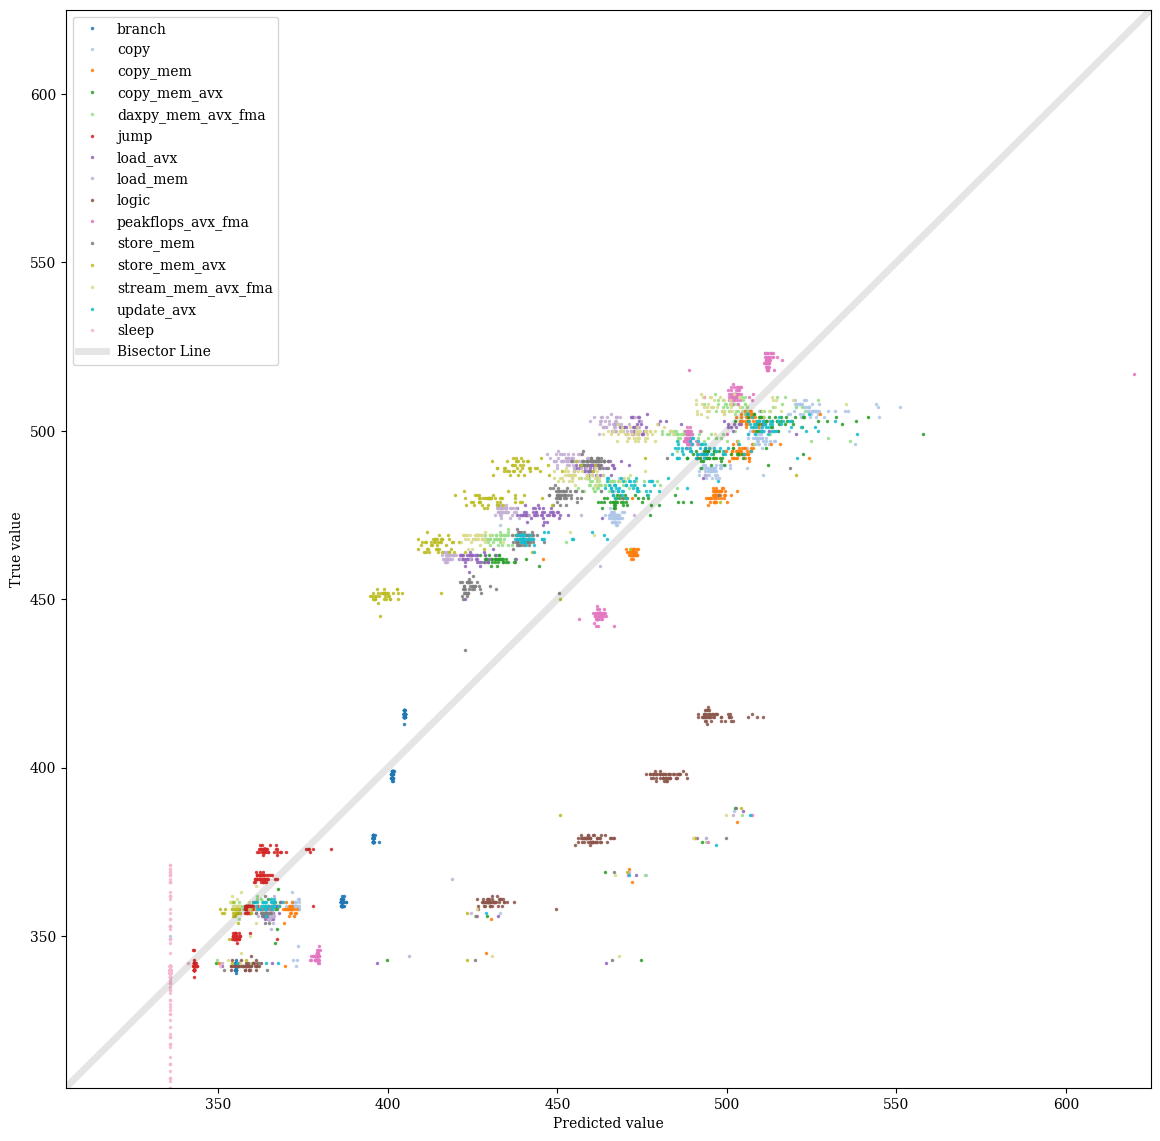

In [78]:
import warnings
warnings.filterwarnings('ignore')

df_list_test= load_df_list_test()
plt.figure(figsize=(14,14))

for df in df_list_test:
#df = pd.concat(df_list_test)
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    #df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]

    #df1=df[ (df["SystemCpuUsage"] < 40) | (df["Total_power"] > 425)].copy()
    df1 = normalize_model1(df.copy())
    prediction=list()
    if True:
        for row in df1[independent_variables].to_numpy():
            #print(row)
            prediction.append(row@coeff_1[:-1] + intercept_1)
        df1["prediction"]=prediction
        if len(df) <1:
            continue
        test_name=df1["name"].iloc[0]
        cores=df1["cores"].iloc[0]
        plt.plot(df1["prediction"],df1["Total_power"], '.', 
                 markersize=3, 
                 alpha=0.8,
                 fillstyle='full',
                 #markeredgecolor='white',
                 markeredgewidth=1,label=test_name,color=name_to_color[test_name])

plt.plot([0,700],[0,700], '-k', linewidth=5, alpha=0.1, label='Bisector Line')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylabel("True value")
plt.xlabel("Predicted value")
plt.xlim([305,625])
plt.ylim([305,625])

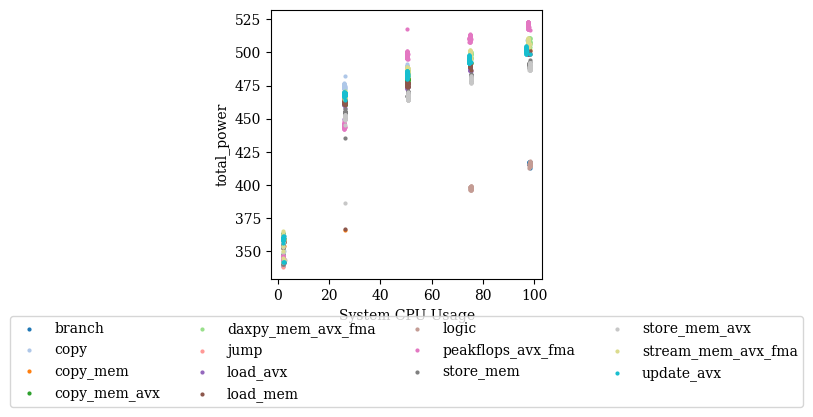

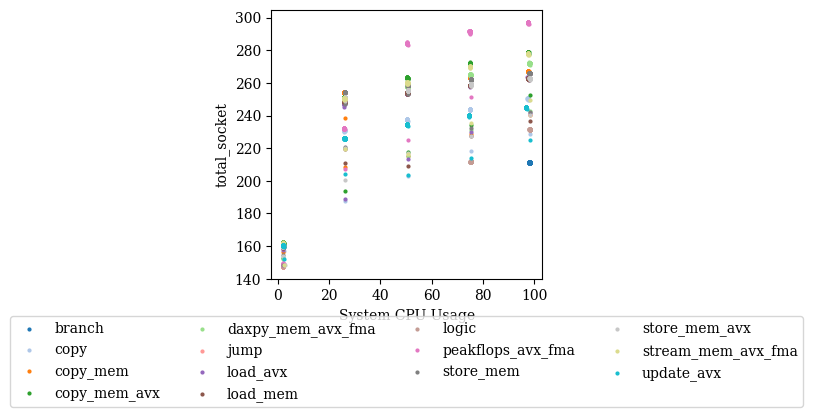

In [28]:
plt.rcParams["font.family"] = "DeJavu Serif"


df_list_test= load_df_list_test()
df=pd.concat(df_list_test)
df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
df["total_power"]=df["PSUPower0"]+df["PSUPower1"]
df["total_socket"]=df["SocketPower0"]+df["SocketPower1"]
#df["total_power"]=df["PSUPower0"]+df["PSUPower1"]
df=df[ (df["SystemCpuUsage"] < 7) | (df["total_socket"] > 200) | (df["total_power"] > 400)]
independent_variables = ['ProbabilityScalarArithmetic',
        'ProbabilityScalarLogic',
        'ProbabilityScalarMemory',
        'ProbabilityScalarBranch',
        'ProbabilityScalarJump',
        'ProbabilityVectorArithmetic',
        'ProbabilityVectorLogic',
        'ProbabilityVectorMemory',
        'ProbabilityVectorBranch',
        'ProbabilityVectorJump']

for source in ['total_power', 'total_socket']:
    plt.figure(figsize=(3.5,3.5))
    color=[name_to_color[i] for i in df["name"]]

    for _,row in df.iterrows():
        plt.scatter(row["SystemCpuUsage"],row[source],s=4,label=row["name"], color=name_to_color[row["name"]])

    plt.ylabel(source)
    plt.xlabel("System CPU Usage")


    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    #plt.legend(by_label.values(), by_label.keys(),ncol=2,handleheight=2.4, labelspacing=0.05)
    #plt.legend(by_label.values(), by_label.keys())
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, -0.5),ncol=4, loc="lower center")
    plt.savefig(f"{source}.pdf", bbox_inches="tight")

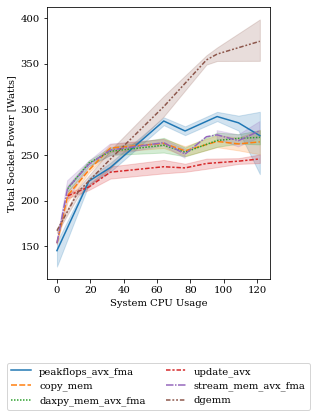

In [100]:
plt.rcParams["font.family"] = "DeJavu Serif"


df_list_test= load_df_list_test()
df=pd.concat(df_list_test)
df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
df["total_power"]=df["PSUPower0"]+df["PSUPower1"]
df["total_socket"]=df["SocketPower0"]+df["SocketPower1"]
#df["total_power"]=df["PSUPower0"]+df["PSUPower1"]
df=df[ (df["SystemCpuUsage"] < 7) | (df["total_socket"] > 250) | (df["total_power"] > 400)]
independent_variables = ['ProbabilityScalarArithmetic',
        'ProbabilityScalarLogic',
        'ProbabilityScalarMemory',
        'ProbabilityScalarBranch',
        'ProbabilityScalarJump',
        'ProbabilityVectorArithmetic',
        'ProbabilityVectorLogic',
        'ProbabilityVectorMemory',
        'ProbabilityVectorBranch',
        'ProbabilityVectorJump']

tests=["peakflops_avx_fma", "daxpy_mem_avx_fma", "dgemm", "update_avx", "copy_mem", "stream_mem_avx_fma"]
frame = pd.DataFrame()
for source in ['total_socket']:
    plt.figure(figsize=(4,5))
    color=[name_to_color[i] for i in df["name"]]
    dfn = df[df["name"].isin(tests)]
    dfn["usage"] = (dfn["SystemCpuUsage"] - (dfn["SystemCpuUsage"] % 5)) * 1.28
    sns.lineplot(data=dfn, x="usage", y=source, hue="name", style="name")
    #for _,row in df.iterrows():
    #    print(row.head())
        #if (row["name"] in ["peakflops_avx_fma", "daxpy_mem_avx_fma","dgemm"]):
        #    sns.lineplot(data=row, x="SystemCpuUsage", y=source, hue=row["name"])
            #plt.scatter(row["SystemCpuUsage"],row[source],s=4,label=row["name"], color=name_to_color[row["name"]])

    plt.ylabel("Total Socket Power [Watts]")
    plt.xlabel("System CPU Usage")


    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    #plt.legend(by_label.values(), by_label.keys(),ncol=1,handleheight=2.4, labelspacing=0.05)
    #plt.legend(by_label.values(), by_label.keys())
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, -0.5),ncol=2, loc="lower center")
    plt.savefig(f"{source}-filled.pdf", bbox_inches="tight")

matplotlib.__version__

36
[25, 45, 65, 85, 105, 125]


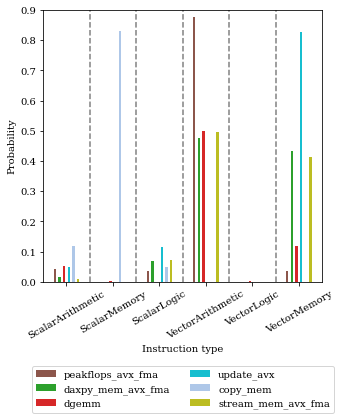

In [95]:
plt.rcParams["font.family"] = "DeJavu Serif"
cores=16
independent_variables=[ "ProbabilityScalarArithmetic",
                        	"ProbabilityScalarMemory", "ProbabilityScalarLogic",
                       #"ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	]#"ProbabilityVectorBranch",
                      # "ProbabilityVectorJump"]#,"SocketPower0","SocketPower1"]

column_name_probability_labels=[ "ScalarArithmetic",
                        	"ScalarMemory", "ScalarLogic",
                       #"ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "VectorArithmetic", 	"VectorLogic",
                       "VectorMemory", 	]#"ProbabilityVectorBranch",
                      # "ProbabilityVectorJump"]#,"SocketPower0","SocketPower1"]

tests=["peakflops_avx_fma", "daxpy_mem_avx_fma", "dgemm", "update_avx", "copy_mem", "stream_mem_avx_fma"]

df_list_test= load_df_list_train()
df=pd.concat(df_list_test)

jitter=np.array([i/len(tests) for i in range(0,len(tests))])
plt.figure(figsize=(5,5))
offset=0
ticks=list()
for var in independent_variables:
    y=list()
    offset+=20
    for test in tests:
        y.append(df[(df["cores"]==32) & (df["name"]==test)][var].mean()/100)
    plt.bar(jitter*12+offset,y,width=1.0,label=tests,color=[name_to_color[t] for t in tests])   
    ticks.append(offset+5)

handles, labels = plt.gca().get_legend_handles_labels()
print(len(handles))
by_label = dict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, -0.5),ncol=2, loc="lower center")
print(ticks)
plt.xticks(ticks=ticks, labels=column_name_probability_labels,rotation=30)
plt.xlabel("Instruction type")
plt.ylabel("Probability")
plt.xlim([15, 135])
plt.ylim([0, 0.9])

for i in range(len(ticks) - 1):
    plt.vlines(ticks[i] + 10, ymin=0, ymax=0.9, colors='gray', linestyles='dashed')
plt.savefig("histogram.pdf", bbox_inches='tight')

In [24]:
df_tmp=df[df["name"]=="dgemm"].copy()

In [25]:
df_tmp[independent_variables].mean()/100

ProbabilityScalarArithmetic    0.052839
ProbabilityScalarMemory        0.004029
ProbabilityScalarLogic         0.002649
ProbabilityVectorArithmetic    0.510796
ProbabilityVectorLogic         0.003750
ProbabilityVectorMemory        0.120059
dtype: float64

In [26]:
def normalize_model1(df):
    percentages=independent_variables=["ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]
    
    df[percentages]=df[percentages]/100
    Pidle = 351
    df["SystemCpuUsage"]=df["SystemCpuUsage"]*128/100
    df["ProcessCpuUsage"]=df["ProcessCpuUsage"]*128/100
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"] 
    df["Total_socket"]=df["SocketPower0"]+df["SocketPower1"] 
    TDP=280

    for var in independent_variables:
  #      df[var]=df[var]*df["SystemCpuUsage"]*TDP*2
        df[var]=np.log(df[var]*df["ProcessCpuUsage"] + 1) #*df["Total_socket"]
        
    df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
        
    return df


In [27]:
def load_df_list_train_noise():
    directory_list=["results_1500/results_no_noise","results_1500/results_noise"]

    #directory_list=["results_1500/results_32"]
    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    if "no_noise" in directory:
                        bench_name="peakflops_no_noise"
                        cores=int(filename.split("_")[1].split(".")[0])
                    #df["name"]=directory+filename[]
                    df["name"]=bench_name
                    df["cores"]=cores
                    df_list.append(df)
                    #df_list.append(df.iloc[2:20])
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list
def load_df_list_test():
    directory_list=["results_1500/results_no_noise","results_1500/results_noise"]

    #directory_list=["results_1500/results_32"]
    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    if "no_noise" in directory:
                        bench_name="peakflops_no_noise"
                        cores=int(filename.split("_")[1].split(".")[0])
                    else:
                        bench_name="peakflops_noise"
                        cores=int(filename.split("_")[1].split(".")[0])
                    #df["name"]=directory+filename[]
                    df["name"]=bench_name
                    df["cores"]=cores
                    df_list.append(df)
                    #df_list.append(df.iloc[2:20])
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list
    
    

In [28]:
df_list_train= load_df_list_train()
df = pd.concat(df_list_train)
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
#df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]
df = normalize_model1(df.copy())

A=df[independent_variables].to_numpy()

b=np.ones((A.shape[0],1))

A=np.hstack((A,b))

coeff_1,error_1=nnls(A, df["Total_power"].to_numpy(), maxiter=1000)
intercept_1=coeff_1[-1]
print(f"Residual {error_1}, intercept {intercept_1}")
#print(coeff)

for name,value in zip(independent_variables,coeff_1):
    print(name,value)

Residual 1007.6856888325165, intercept 353.3886553080839
ProbabilityScalarArithmetic 13.351666843501091
ProbabilityScalarMemory 23.988412716174278
ProbabilityScalarLogic 0.0
ProbabilityVectorArithmetic 16.80911587811535
ProbabilityVectorLogic 170.8737397393976
ProbabilityVectorMemory 24.38828633127049


{'peakflops_no_noise': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'peakflops_noise': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)}


(300.0, 700.0)

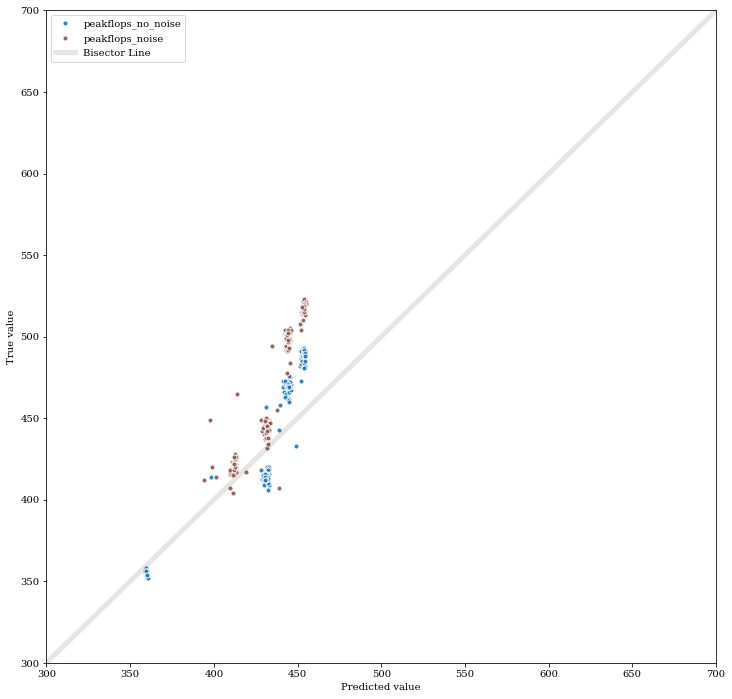

In [29]:
df= load_df_list_test()
df = pd.concat(df)
# Example usage:
cores_to_color = assign_colors(df["cores"])
name_to_color = assign_colors(df["name"])

print(name_to_color)  # This will print the mapping of labels to colors
import warnings
warnings.filterwarnings('ignore')

df_list_test= load_df_list_test()
plt.figure(figsize=(12,12))

for df in df_list_test:
#df = pd.concat(df_list_test)
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]

    #df1=df[ (df["SystemCpuUsage"] < 40) | (df["Total_power"] > 425)].copy()
    df1 = normalize_model1(df.copy())
    prediction=list()
    if True:
        for row in df1[independent_variables].to_numpy():
            #print(row)
            prediction.append(row@coeff_1[:-1] + intercept_1)
        df1["prediction"]=prediction
        if len(df) <1:
            continue
        test_name=df1["name"].iloc[0]
        cores=df1["cores"].iloc[0]
        plt.plot(df1["prediction"],df1["Total_power"], 'o', 
                 markersize=5, 
                 alpha=0.9,
                 fillstyle='full',
                 markeredgecolor='white',
                 markeredgewidth=1,label=test_name,color=name_to_color[test_name])

plt.plot([0,700],[0,700], '-k', linewidth=5, alpha=0.1, label='Bisector Line')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylabel("True value")
plt.xlabel("Predicted value")
plt.xlim([300,700])
plt.ylim([300,700])

{'peakflops_no_noise': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'peakflops_noise': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)}


(300.0, 700.0)

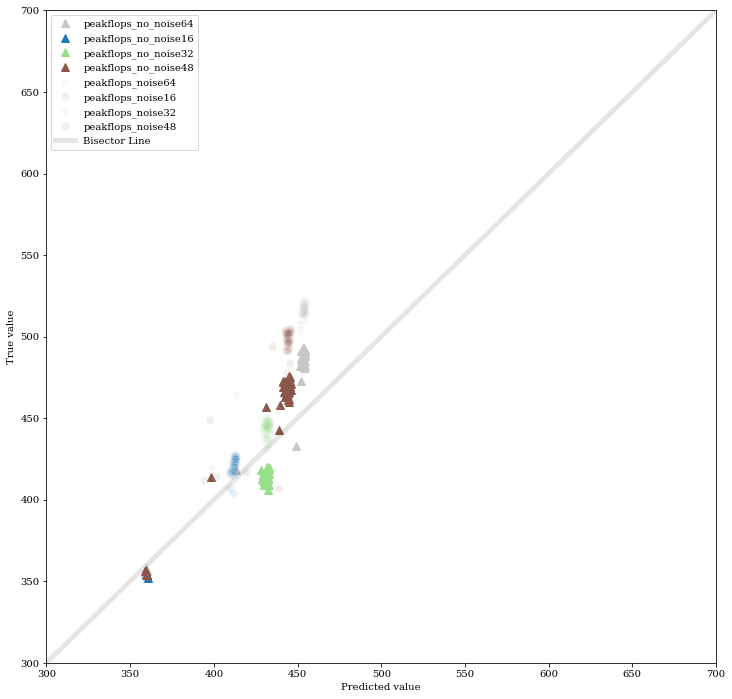

In [30]:
df= load_df_list_test()
df = pd.concat(df)
# Example usage:
cores_to_color = assign_colors(df["cores"])
name_to_color = assign_colors(df["name"])

print(name_to_color)  # This will print the mapping of labels to colors
import warnings
warnings.filterwarnings('ignore')

df_list_test= load_df_list_test()
plt.figure(figsize=(12,12))

for df in df_list_test:
#df = pd.concat(df_list_test)
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]

    #df1=df[ (df["SystemCpuUsage"] < 40) | (df["Total_power"] > 425)].copy()
    df1 = normalize_model1(df.copy())
    prediction=list()
    if True:
        for row in df1[independent_variables].to_numpy():
            #print(row)
            prediction.append(row@coeff_1[:-1] + intercept_1)
        df1["prediction"]=prediction
        if len(df) <1:
            continue
        test_name=df1["name"].iloc[0]
        cores=df1["cores"].iloc[0]
        if test_name=="peakflops_no_noise":
            pass
            plt.plot(df1["prediction"],df1["Total_power"], '^', 
                     markersize=8, 
                     alpha=1.0,
                     fillstyle='full',
#                     markeredgecolor='white',
                     markeredgewidth=1,label=test_name+f"{cores}",color=cores_to_color[cores])
        
        if test_name=="peakflops_noise":
            plt.plot(df1["prediction"],df1["Total_power"], 'o', 
                     markersize=8, 
                     alpha=0.1,
                     fillstyle='full',
                     markeredgecolor='white',
                     markeredgewidth=1,label=test_name+f"{cores}",color=cores_to_color[cores])

plt.plot([0,700],[0,700], '-k', linewidth=5, alpha=0.1, label='Bisector Line')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylabel("True value")
plt.xlabel("Predicted value")
plt.xlim([300,700])
plt.ylim([300,700])

{'peakflops_no_noise': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'peakflops_noise': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)}


(300.0, 700.0)

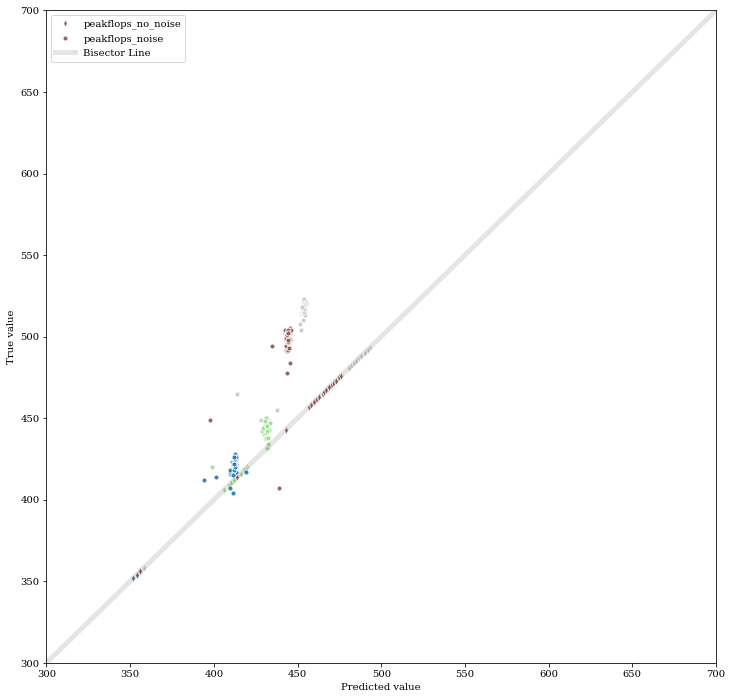

In [31]:
df= load_df_list_test()
df = pd.concat(df)
# Example usage:
cores_to_color = assign_colors(df["cores"])
name_to_color = assign_colors(df["name"])

print(name_to_color)  # This will print the mapping of labels to colors
import warnings
warnings.filterwarnings('ignore')

df_list_test= load_df_list_test()
plt.figure(figsize=(12,12))

for df in df_list_test:
#df = pd.concat(df_list_test)
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]

    #df1=df[ (df["SystemCpuUsage"] < 40) | (df["Total_power"] > 425)].copy()
    df1 = normalize_model1(df.copy())
    prediction=list()
    if True:
        for row in df1[independent_variables].to_numpy():
            #print(row)
            prediction.append(row@coeff_1[:-1] + intercept_1)
        df1["prediction"]=prediction
        if len(df) <1:
            continue
        test_name=df1["name"].iloc[0]
        cores=df1["cores"].iloc[0]
        if test_name=="peakflops_no_noise":
            pass
            plt.plot(df1["Total_power"],df1["Total_power"], 'd', 
                     markersize=5, 
                     alpha=0.9,
                     fillstyle='full',
                     markeredgecolor='white',
                     markeredgewidth=1,label=test_name,color=cores_to_color[cores])
        
        if test_name=="peakflops_noise":
            pass
            plt.plot(df1["prediction"],df1["Total_power"], 'o', 
                     markersize=5, 
                     alpha=0.9,
                     fillstyle='full',
                     markeredgecolor='white',
                     markeredgewidth=1,label=test_name,color=cores_to_color[cores])

plt.plot([0,700],[0,700], '-k', linewidth=5, alpha=0.1, label='Bisector Line')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylabel("True value")
plt.xlabel("Predicted value")
plt.xlim([300,700])
plt.ylim([300,700])

{'peakflops_no_noise': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'peakflops_noise': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)}


Text(0.5, 0, 'experiment')

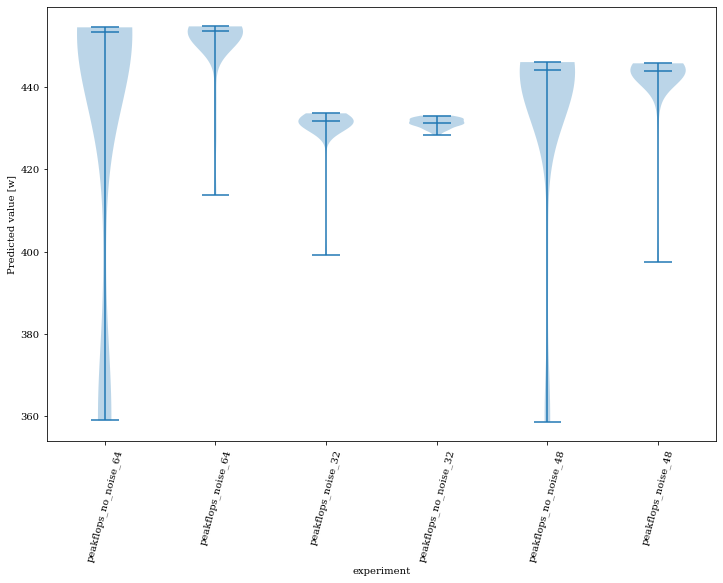

In [32]:
df= load_df_list_test()
df = pd.concat(df)
# Example usage:
cores_to_color = assign_colors(df["cores"])
name_to_color = assign_colors(df["name"])

print(name_to_color)  # This will print the mapping of labels to colors
import warnings
warnings.filterwarnings('ignore')

df_list_test= load_df_list_test()
plt.figure(figsize=(12,8))

columns=list()
columns_labels=list()
for df in df_list_test:
    
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]
    df1 = normalize_model1(df.copy())
    if len(df) <1:
        continue
    test_name=df1["name"].iloc[0]
    cores=df1["cores"].iloc[0]
    if cores==8 or cores==16:
        continue
    prediction=list()
    
    for row in df1[independent_variables].to_numpy():
        prediction.append(row@coeff_1[:-1] + intercept_1)
    df1["prediction"]=prediction

    test_name=df1["name"].iloc[0]
    cores=df1["cores"].iloc[0]
    
    columns.append(df1["prediction"])
    columns_labels.append(test_name+f"_{cores}")
    
#    if test_name=="peakflops_no_noise":
#        plt.violinplot(df1["prediction"])
        
#    if test_name=="peakflops_noise":
#        plt.violin(df1["prediction"])
#for i in range(len(columns)/2):
columns[1],columns[3]=columns[3],columns[1]
columns_labels[1],columns_labels[3]=columns_labels[3],columns_labels[1]

columns[2],columns[4]=columns[4],columns[2]
columns_labels[2],columns_labels[4]=columns_labels[4],columns_labels[2]

violin_parts = plt.violinplot(columns, showmedians=True)
plt.xticks([y + 1 for y in range(len(columns))],
                  labels=columns_labels,rotation=90-15)


#plt.plot([0,700],[0,700], '-k', linewidth=5, alpha=0.1, label='Bisector Line')
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
plt.ylabel("Predicted value [w]")
plt.xlabel("experiment")
#plt.xlim([300,700])
#plt.ylim([300,700])

In [21]:
def load_df_noise():
    directory_list=["results_1500/results_noise"]

    #directory_list=["results_1500/results_32"]
    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    if "no_noise" in directory:
                        bench_name="peakflops_no_noise"
                        cores=int(filename.split("_")[1].split(".")[0])
                    else:
                        bench_name="peakflops_noise"
                        cores=int(filename.split("_")[1].split(".")[0])
                    #df["name"]=directory+filename[]
                    df["name"]=bench_name
                    df["cores"]=cores
                    #df_list.append(df)
                    df_list.append(df.iloc[2:20])
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list
    
def load_df_no_noise():
    directory_list=["results_1500/results_no_noise"]

    #directory_list=["results_1500/results_32"]
    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    if "no_noise" in directory:
                        bench_name="peakflops_no_noise"
                        cores=int(filename.split("_")[1].split(".")[0])
                    else:
                        bench_name="peakflops_noise"
                        cores=int(filename.split("_")[1].split(".")[0])
                    #df["name"]=directory+filename[]
                    df["name"]=bench_name
                    df["cores"]=cores
                    #df_list.append(df)
                    df_list.append(df.iloc[2:20])
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list

In [22]:
Pstatic=345.9
Cores=16

In [23]:
df=pd.concat(load_df_noise())

In [24]:
df=df[df["cores"]==Cores]

In [25]:
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
print(f"E[total-static] {df["Total_power"].mean()-Pstatic}")

SyntaxError: invalid syntax (<ipython-input-25-291ed46265a3>, line 2)

In [ ]:
df=pd.concat(load_df_no_noise())
df=df[df["cores"]==Cores]
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
print(f"E[total-static] {df["Total_power"].mean()-Pstatic}")